In [0]:
#IMPORT ALL NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
# To calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [0]:
#LOAD THE TWO DATASETS adult.data AND adult.test AS TWO PANDAS DATA FRAMES
adultDataDF = pd.read_csv("adult.data", names=['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', '>50k'])
adultTestDF = pd.read_csv("adult.test", names=['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', '>50k'], header = 0)

In [0]:
#COMBINE THE TWO LOADED DATA FRAMES INTO ONE
adultDF = pd.concat([adultDataDF, adultTestDF], ignore_index=True, sort =False)

In [0]:
adultDF.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,>50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
#Display the number of missing values(if any) in each of the attributes and treat them accordingly.
adultDF.isnull().sum()
#According to the above code, there is no data missing from the records for any attribute.

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
hoursPerWeek     0
nativeCountry    0
>50k             0
dtype: int64

In [0]:
#Perform basic EDA

In [0]:
adultDF.shape

(48842, 15)

In [0]:
adultDF.dtypes

age               int64
workclass        object
fnlwgt            int64
education        object
educationNum      int64
maritalStatus    object
occupation       object
relationship     object
race             object
sex              object
capitalGain       int64
capitalLoss       int64
hoursPerWeek      int64
nativeCountry    object
>50k             object
dtype: object

In [0]:
adultDF.describe().transpose()
#There are 6 attributes/columns which are numeric in nature. Other attributes/columns are categoric.

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educationNum,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capitalGain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capitalLoss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hoursPerWeek,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [0]:
#Univariate analysis

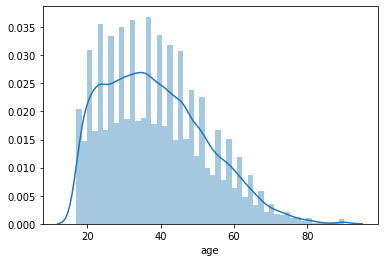

In [0]:
sns.distplot(adultDF['age'])

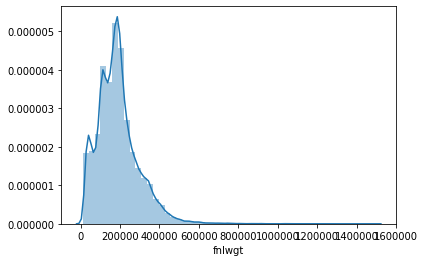

In [0]:
sns.distplot(adultDF['fnlwgt'])

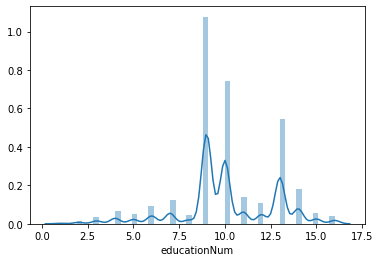

In [0]:
sns.distplot(adultDF['educationNum'])

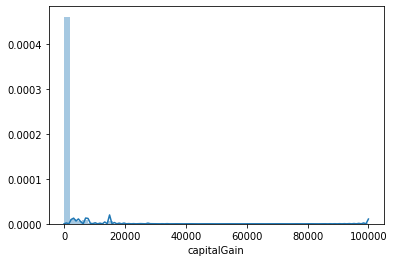

In [0]:
sns.distplot(adultDF['capitalGain'])
#There are a lot of zero values in this column which is not very useful.

In [0]:
#Count number of zeroes in capitalGain column to total number of records as a percentage.
( (adultDF.capitalGain == 0).sum() / adultDF.capitalGain.size * 100 )
# Over 91% of the records in capitalGain column are zero. So, it is better to drop this column from the data frame.

91.73866754023177

In [0]:
adultDF.drop('capitalGain', axis = 1, inplace = True)

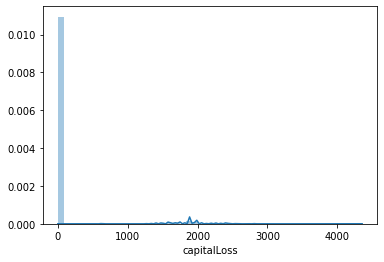

In [0]:
sns.distplot(adultDF['capitalLoss'])
#There are a lot of zero values in this column which is not very useful.

In [0]:
#Count number of zeroes in capitalLoss column to total number of records as a percentage.
( (adultDF.capitalLoss == 0).sum() / adultDF.capitalLoss.size * 100 )
# Over 95% of the records in capitalLoss column are zero. So, it is better to drop this column from the data frame.

95.3277916547234

In [0]:
adultDF.drop('capitalLoss', axis = 1, inplace = True)

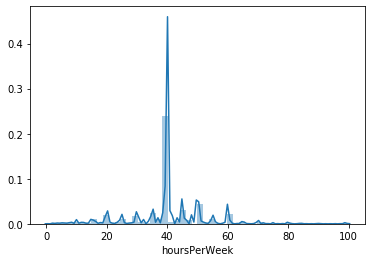

In [0]:
sns.distplot(adultDF['hoursPerWeek'])

In [0]:
adultDF['workclass'].value_counts(normalize=True)

 Private             0.694198
 Self-emp-not-inc    0.079071
 Local-gov           0.064207
 ?                   0.057307
 State-gov           0.040559
 Self-emp-inc        0.034704
 Federal-gov         0.029319
 Without-pay         0.000430
 Never-worked        0.000205
Name: workclass, dtype: float64

In [0]:
adultDF['education'].value_counts(normalize=True)

 HS-grad         0.323164
 Some-college    0.222718
 Bachelors       0.164305
 Masters         0.054400
 Assoc-voc       0.042197
 11th            0.037099
 Assoc-acdm      0.032779
 10th            0.028439
 7th-8th         0.019553
 Prof-school     0.017075
 9th             0.015478
 12th            0.013452
 Doctorate       0.012162
 5th-6th         0.010421
 1st-4th         0.005057
 Preschool       0.001699
Name: education, dtype: float64

In [0]:
adultDF['maritalStatus'].value_counts(normalize=True)

 Married-civ-spouse       0.458192
 Never-married            0.329982
 Divorced                 0.135805
 Separated                0.031325
 Widowed                  0.031080
 Married-spouse-absent    0.012858
 Married-AF-spouse        0.000758
Name: maritalStatus, dtype: float64

In [0]:
adultDF['occupation'].value_counts(normalize=True)

 Prof-specialty       0.126367
 Craft-repair         0.125138
 Exec-managerial      0.124606
 Adm-clerical         0.114881
 Sales                0.112690
 Other-service        0.100794
 Machine-op-inspct    0.061873
 ?                    0.057512
 Transport-moving     0.048217
 Handlers-cleaners    0.042423
 Farming-fishing      0.030507
 Tech-support         0.029606
 Protective-serv      0.020126
 Priv-house-serv      0.004955
 Armed-Forces         0.000307
Name: occupation, dtype: float64

In [0]:
adultDF['relationship'].value_counts(normalize=True)

 Husband           0.403669
 Not-in-family     0.257627
 Own-child         0.155215
 Unmarried         0.104930
 Wife              0.047725
 Other-relative    0.030834
Name: relationship, dtype: float64

In [0]:
adultDF['race'].value_counts(normalize=True)

 White                 0.855043
 Black                 0.095922
 Asian-Pac-Islander    0.031100
 Amer-Indian-Eskimo    0.009623
 Other                 0.008313
Name: race, dtype: float64

In [0]:
adultDF['sex'].value_counts(normalize=True)

 Male      0.668482
 Female    0.331518
Name: sex, dtype: float64

In [0]:
adultDF['nativeCountry'].value_counts(normalize=True)

 United-States                 0.897424
 Mexico                        0.019471
 ?                             0.017546
 Philippines                   0.006040
 Germany                       0.004218
 Puerto-Rico                   0.003767
 Canada                        0.003726
 El-Salvador                   0.003173
 India                         0.003092
 Cuba                          0.002825
 England                       0.002600
 China                         0.002498
 South                         0.002355
 Jamaica                       0.002170
 Italy                         0.002150
 Dominican-Republic            0.002109
 Japan                         0.001884
 Guatemala                     0.001802
 Poland                        0.001781
 Vietnam                       0.001761
 Columbia                      0.001740
 Haiti                         0.001536
 Portugal                      0.001372
 Taiwan                        0.001331
 Iran                          0.001208


In [0]:
adultDF['>50k'].value_counts(normalize=True)
#There are two instances for each class i.e. for <=50K and for >50K, one with dot and one without a dot.

 <=50K     0.506122
 <=50K.    0.254596
 >50K      0.160538
 >50K.     0.078744
Name: >50k, dtype: float64

In [0]:
adultDF.loc[adultDF['>50k'].str.strip() == "<=50K", '>50k'] = 0
adultDF.loc[adultDF['>50k'].str.strip() == "<=50K.", '>50k'] = 0
adultDF.loc[adultDF['>50k'].str.strip() == ">50K", '>50k'] = 1
adultDF.loc[adultDF['>50k'].str.strip() == ">50K.", '>50k'] = 1

In [0]:
#Encoding categorical columns.
for col_name in adultDF.columns:
    if(adultDF[col_name].dtype == 'object'):
        adultDF[col_name]= adultDF[col_name].astype('category')
        adultDF[col_name] = adultDF[col_name].cat.codes

In [0]:
#Pair plot for all the attributes
sns.pairplot(adultDF)

In [0]:
#Prepare/preprocess the data to train any given ML model
#X = adultDF.drop('>50k', axis=1)
#Y = adultDF[['>50k']]
X = adultDF.values[:,:12]  ## Features
Y = adultDF.values[:,12]  ## Target

In [0]:
#Split the data into train and test set. test set size = 30% of the original combined data.
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [0]:
#With the help of preprocessing function, it would be better to regularize the values in the attributes.
xTrain = preprocessing.scale(xTrain)
xTest = preprocessing.scale(xTest)

In [0]:
#Use any 4 classification algorithms learnt during the course, fit the models with the train data and predict on the test set.

In [0]:
#Logistic Regression
logisticModel = LogisticRegression()
logisticModel.fit(xTrain, yTrain)
logisticYPredict = logisticModel.predict(xTest)
logisticModelScore = logisticModel.score(xTest, yTest)
print('Score: ', logisticModelScore)

#Compute the accuracy, recall and precision for each of the models.
logisticCM = metrics.confusion_matrix(yTest, logisticYPredict)
print('Confusion matrix: ', logisticCM)

logisticAccuracy = accuracy_score(yTest, logisticYPredict)
print('Accuracy: ', logisticAccuracy)

#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
logisticRecallFor0 = recall_score(yTest, logisticYPredict, pos_label=0)
logisticRecallFor1 = recall_score(yTest, logisticYPredict, pos_label=1)

print('Recall for 0: ', logisticRecallFor0)
print('Recall for 1: ', logisticRecallFor1)

logisticPrecisionFor0 = precision_score(yTest, logisticYPredict, pos_label=0)
logisticPrecisionFor1 = precision_score(yTest, logisticYPredict, pos_label=1)

print('Precision for 0: ', logisticPrecisionFor0)
print('Precision for 1: ', logisticPrecisionFor1)

C:\Users\Sarvesh Chandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.8062512796014468
Confusion matrix:  [[10407   745]
 [ 2094  1407]]
Accuracy:  0.8062512796014468
Recall for 0:  0.9331958393113343
Recall for 1:  0.401885175664096
Precision for 0:  0.8324934005279577
Precision for 1:  0.6538104089219331


In [0]:
#Naive Bayes
nb = GaussianNB()
nb.fit(xTrain, yTrain)
nbYPredict = nb.predict(xTest)

nbAccuracy = accuracy_score(yTest, nbYPredict, normalize = True)
print('Accuracy: ', nbAccuracy)

nbCM = metrics.confusion_matrix(yTest, nbYPredict)
print('Confusion Matrix: ', nbCM)

#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
nbRecallFor0 = recall_score(yTest, nbYPredict, pos_label=0)
nbRecallFor1 = recall_score(yTest, nbYPredict, pos_label=1)

print('Recall for 0: ', nbRecallFor0)
print('Recall for 1: ', nbRecallFor1)

nbPrecisionFor0 = precision_score(yTest, nbYPredict, pos_label=0)
nbPrecisionFor1 = precision_score(yTest, nbYPredict, pos_label=1)

print('Precision for 0: ', nbPrecisionFor0)
print('Precision for 1: ', nbPrecisionFor1)

Accuracy:  0.769398757933529
Confusion Matrix:  [[8814 2338]
 [1041 2460]]
Recall for 0:  0.7903515064562411
Recall for 1:  0.702656383890317
Precision for 0:  0.8943683409436834
Precision for 1:  0.5127136306794498


In [0]:
#KNN Classifier

#Optimizing performance of KNN by changing the hyper parameter n_neighbors with different values.

knn1 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
# fitting the model
knn1.fit(xTrain, yTrain)
# predict the response
knn1YPredict = knn1.predict(xTest)
# evaluate accuracy
knn1Accuracy = accuracy_score(yTest, knn1YPredict)
print('Accuracy1: ', knn1Accuracy)

knn2 = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
# fitting the model
knn2.fit(xTrain, yTrain)
# predict the response
knn2YPredict = knn2.predict(xTest)
# evaluate accuracy
knn2Accuracy = accuracy_score(yTest, knn2YPredict)
print('Accuracy2: ', knn2Accuracy)

knn3 = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
# fitting the model
knn3.fit(xTrain, yTrain)
# predict the response
knn3YPredict = knn3.predict(xTest)
# evaluate accuracy
knn3Accuracy = accuracy_score(yTest, knn3YPredict)
print('Accuracy3: ', knn3Accuracy)

knn4 = KNeighborsClassifier(n_neighbors= 15 , weights = 'distance' )
# fitting the model
knn4.fit(xTrain, yTrain)
# predict the response
knn4YPredict = knn4.predict(xTest)
# evaluate accuracy
knn4Accuracy = accuracy_score(yTest, knn4YPredict)
print('Accuracy4: ', knn4Accuracy)

#Taking knn4 for higher accuracy.
print('Taking 4th knn as it yields higher accuracy.')

knnCM = metrics.confusion_matrix(yTest, knn4YPredict)
print('Confusion Matrix: ', knnCM)

#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
knnRecallFor0 = recall_score(yTest, knn4YPredict, pos_label=0)
knnRecallFor1 = recall_score(yTest, knn4YPredict, pos_label=1)

print('Recall for 0: ', knnRecallFor0)
print('Recall for 1: ', knnRecallFor1)

knnPrecisionFor0 = precision_score(yTest, knn4YPredict, pos_label=0)
knnPrecisionFor1 = precision_score(yTest, knn4YPredict, pos_label=1)

print('Precision for 0: ', knnPrecisionFor0)
print('Precision for 1: ', knnPrecisionFor1)

Accuracy1:  0.8018835733296936
Accuracy2:  0.8117109124411384
Accuracy3:  0.8196273800586911
Accuracy4:  0.8229031597625059
Taking 4th knn as it yields higher accuracy.
Confusion Matrix:  [[10059  1093]
 [ 1502  1999]]
Recall for 0:  0.9019906743185079
Recall for 1:  0.5709797200799771
Precision for 0:  0.870080442868264
Precision for 1:  0.6465071151358344


In [0]:
#SVM Classifier

In [0]:
#Optimizing SVC model by using different kernels.

#SVC model using linear kernel
svc1Model = SVC(C= .1, kernel='linear', gamma= 'auto')
svc1Model.fit(xTrain, yTrain)
svc1YPredict = svc1Model.predict(xTest)

# check the accuracy
trainAccuracy1 = svc1Model.score(xTrain, yTrain)
print('train accuracy 1: ', trainAccuracy1)
testAccuracy1 = svc1Model.score(xTest, yTest)
print('test accuracy 1: ', testAccuracy1)

#SVC outputs are taking a little more time to generate. Please wait for the output.

train accuracy 1:  0.8075111878089444
test accuracy 1:  0.8088446052003003


In [0]:
#SVC model using rbf kernel
svc2Model = SVC(kernel='rbf')
svc2Model.fit(xTrain, yTrain)
svc2YPredict = svc2Model.predict(xTest)

# check the accuracy
trainAccuracy2 = svc2Model.score(xTrain, yTrain)
print('train accuracy 2: ', trainAccuracy2)
testAccuracy2 = svc2Model.score(xTest, yTest)
print('test accuracy 2: ', testAccuracy2)

#Please wait for the output.

train accuracy 2:  0.8329872181110883
test accuracy 2:  0.8292499829386474


In [0]:
#SVC model using poly kernel
svc3Model = SVC(kernel='poly')
svc3Model.fit(xTrain, yTrain)
svc3YPredict = svc3Model.predict(xTest)

# check the accuracy
trainAccuracy3 = svc3Model.score(xTrain, yTrain)
print('train accuracy 3: ', trainAccuracy3)
testAccuracy3 = svc3Model.score(xTest, yTest)
print('test accuracy 3: ', testAccuracy3)

#Please wait for the output.

train accuracy 3:  0.8243879610401006
test accuracy 3:  0.825291749129871


In [0]:
#SVC model using sigmoid kernel
svc4Model = SVC(kernel='sigmoid')
svc4Model.fit(xTrain, yTrain)
svc4YPredict = svc4Model.predict(xTest)

# check the accuracy
trainAccuracy4 = svc4Model.score(xTrain, yTrain)
print('train accuracy 4: ', trainAccuracy4)
testAccuracy4 = svc4Model.score(xTest, yTest)
print('test accuracy 4: ', testAccuracy4)

#Please wait for the output.

train accuracy 4:  0.7278071894468982
test accuracy 4:  0.7307036101822152


In [0]:
#Taking 2nd svc model as it yields higher accuracy.
svcCM = metrics.confusion_matrix(yTest, svc2YPredict)
print('Confusion Matrix: ', svcCM)

#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
svcRecallFor0 = recall_score(yTest, svc2YPredict, pos_label=0)
svcRecallFor1 = recall_score(yTest, svc2YPredict, pos_label=1)

print('Recall for 0: ', svcRecallFor0)
print('Recall for 1: ', svcRecallFor1)

svcPrecisionFor0 = precision_score(yTest, svc2YPredict, pos_label=0)
svcPrecisionFor1 = precision_score(yTest, svc2YPredict, pos_label=1)

print('Precision for 0: ', svcPrecisionFor0)
print('Precision for 1: ', svcPrecisionFor1)

Confusion Matrix:  [[10478   674]
 [ 1828  1673]]
Recall for 0:  0.9395624103299857
Recall for 1:  0.4778634675806912
Precision for 0:  0.8514545750040631
Precision for 1:  0.7128248828291436


In [0]:
#Create a dataframe with 4 columns. ['model name', 'accuracy', 'recall', 'precision'].
performance = pd.DataFrame(data = {'Model Name': ['Logistic Regression', 'Naive Bayes', 'KNN', 'SVC'], 'Accuracy': [logisticAccuracy, nbAccuracy, knn4Accuracy, testAccuracy2], 'Recall(>50k,<=50k)': [(logisticRecallFor1, logisticRecallFor0), (nbRecallFor1, nbRecallFor0), (knnRecallFor1, knnRecallFor0), (svcRecallFor1, svcRecallFor0)], 'Precision(>50k,<=50k)': [(logisticPrecisionFor1, logisticPrecisionFor0), (nbPrecisionFor1, nbPrecisionFor0), (knnPrecisionFor1, knnPrecisionFor0), (svcPrecisionFor1, svcPrecisionFor0)]})
print(performance)

            Model Name  Accuracy                        Recall(>50k,<=50k)  \
0  Logistic Regression  0.806251   (0.401885175664096, 0.9331958393113343)   
1          Naive Bayes  0.769399   (0.702656383890317, 0.7903515064562411)   
2                  KNN  0.822903  (0.5709797200799771, 0.9019906743185079)   
3                  SVC  0.829250  (0.4778634675806912, 0.9395624103299857)   

                      Precision(>50k,<=50k)  
0  (0.6538104089219331, 0.8324934005279577)  
1  (0.5127136306794498, 0.8943683409436834)  
2   (0.6465071151358344, 0.870080442868264)  
3  (0.7128248828291436, 0.8514545750040631)  
